In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy
%config IPCompleter.greedy=True

### Requirement:
We have the loan dataset on folder **loan_prediction-1**. This dataset contains loan information of a bank. Here is step need to be done:
1. Read dataset.
2. We need to build a model to predict whether a cutomer can be borrowed not not. We need to to do basic analysis of X_Train with columns:'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_term', 'Credit_History'. Then visulize them 
we need to check these two columns, if there is NULL on row, drop NULL row, then do basic analysis and visualize them.
3. In order to improve the accuracy, we need to check and standardize data. Choose which method to standardize and visualize them after.

In [3]:
feature_data = pd.read_csv("data/loan_prediction-1/X_train.csv")
result_data = pd.read_csv("data/loan_prediction-1/Y_train.csv")

In [4]:
feature_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban


In [5]:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 12 columns):
Loan_ID              384 non-null object
Gender               384 non-null object
Married              384 non-null object
Dependents           384 non-null object
Education            384 non-null object
Self_Employed        384 non-null object
ApplicantIncome      384 non-null int64
CoapplicantIncome    384 non-null float64
LoanAmount           384 non-null int64
Loan_Amount_Term     384 non-null int64
Credit_History       384 non-null int64
Property_Area        384 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 36.1+ KB


In [6]:
def continous_analysis(data, col):
    colSer = data[col]
    mean = colSer.mean()
    mode = colSer.mode()
    median = colSer.median()
    range_ = colSer.ptp()
    std = colSer.std()
    skew = colSer.skew()
    kurtois = colSer.kurtosis()
    print("==============================")
    print(col, "Mean:", mean)
    print(col, "Mode:", mode.values)
    print(col, "Median:", median)
    print(col, "Std:", std)
    print(col, "Range:", range_)
    print(col, "Skew:", skew)
    print(col, "Kurtois:", kurtois)
    print("\n")

### Credit_History is binary data and Loan_Amount_Term is the number of month. So we do not standardize them

In [7]:
dataset = feature_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
for col in dataset:
    continous_analysis(dataset, col)

ApplicantIncome Mean: 5149.71875
ApplicantIncome Mode: [4583]
ApplicantIncome Median: 3893.5
ApplicantIncome Std: 5304.921763615458
ApplicantIncome Range: 80850
ApplicantIncome Skew: 8.744947425229876
ApplicantIncome Kurtois: 113.22736336347715


CoapplicantIncome Mean: 1572.0779166370833
CoapplicantIncome Mode: [0.]
CoapplicantIncome Median: 1188.5
CoapplicantIncome Std: 2624.2231190040734
CoapplicantIncome Range: 33837.0
CoapplicantIncome Skew: 6.30724251888622
CoapplicantIncome Kurtois: 65.69052903202048


LoanAmount Mean: 141.47135416666666
LoanAmount Mode: [110 120]
LoanAmount Median: 128.0
LoanAmount Std: 75.17627127046215
LoanAmount Range: 591
LoanAmount Skew: 2.3296530769059145
LoanAmount Kurtois: 9.176309065071921




/home/dat-tran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  


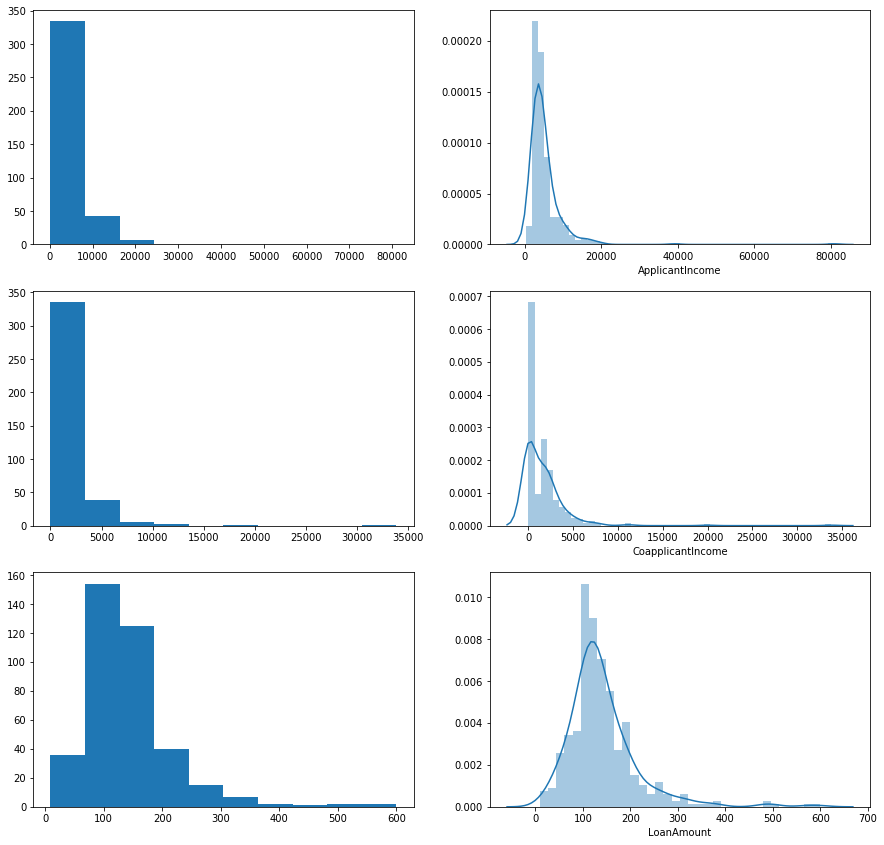

In [8]:
plt.figure(figsize=(15,25))
plt.subplot(5,2,1)
plt.hist(dataset.ApplicantIncome)
plt.subplot(5,2,2)
sb.distplot(dataset.ApplicantIncome)
plt.subplot(5,2,3)
plt.hist(dataset.CoapplicantIncome)
plt.subplot(5,2,4)
sb.distplot(dataset.CoapplicantIncome)
plt.subplot(5,2,5)
plt.hist(dataset.LoanAmount)
plt.subplot(5,2,6)
sb.distplot(dataset.LoanAmount)

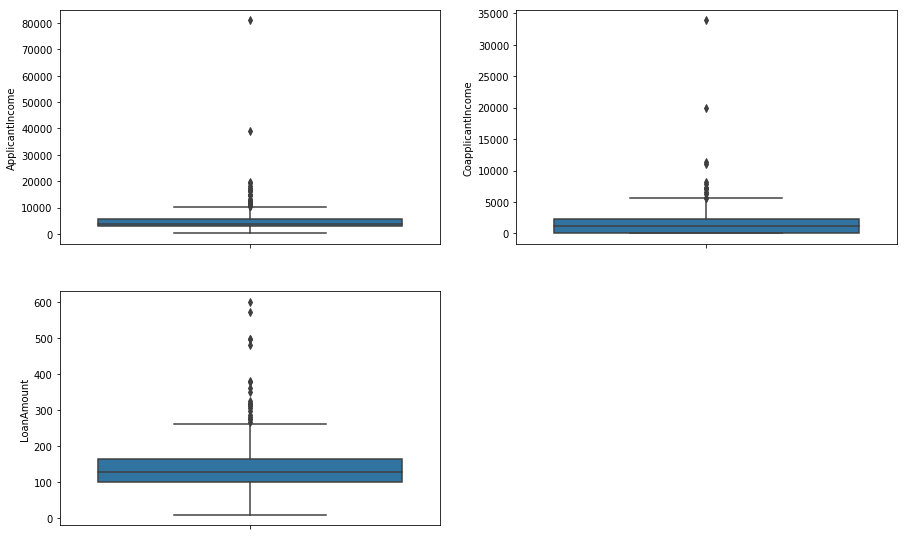

In [9]:
plt.figure(figsize=(15,25))
plt.subplot(5,2,1)
sb.boxplot(dataset.ApplicantIncome, orient='v')
plt.subplot(5,2,2)
sb.boxplot(dataset.CoapplicantIncome, orient='v')
plt.subplot(5,2,3)
sb.boxplot(dataset.LoanAmount, orient='v')

### ApplicantIncome, CoapplicantIncome, LoanAmount columns have outliers and does not normal distribution. We apply RobustScale to standardize data

In [10]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
scale_data = scaler.fit_transform(dataset)

In [11]:
new_df = pd.DataFrame(scale_data, columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

In [12]:
new_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.361722,-0.526060,-0.046693
1,-0.346315,0.289698,-0.077821
2,-0.305915,0.985947,-1.120623
3,1.989044,-0.526060,-0.249027
4,-0.534281,0.543765,0.124514


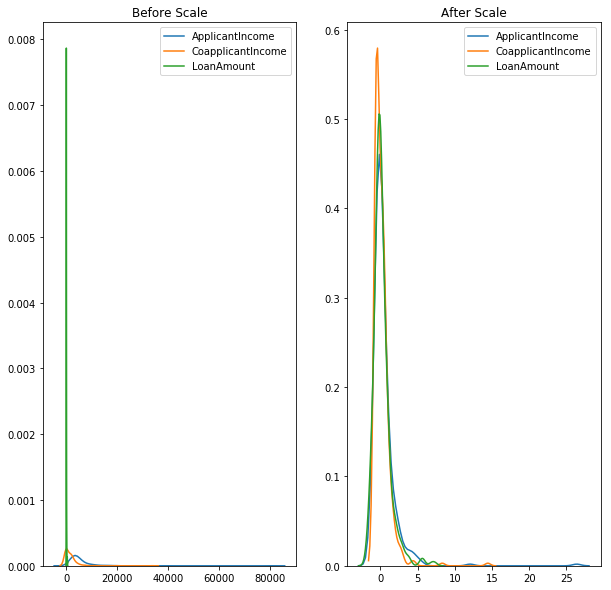

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sb.kdeplot(dataset.ApplicantIncome)
sb.kdeplot(dataset.CoapplicantIncome)
sb.kdeplot(dataset.LoanAmount)
plt.title("Before Scale")
plt.subplot(1,2,2)
plt.title("After Scale")
sb.kdeplot(new_df.ApplicantIncome)
sb.kdeplot(new_df.CoapplicantIncome)
sb.kdeplot(new_df.LoanAmount)
